In [56]:
# show magic cmds
%quickref


IPython -- An enhanced Interactive Python - Quick Reference Card

obj?, obj??      : Get help, or more help for object (also works as
                   ?obj, ??obj).
?foo.*abc*       : List names in 'foo' containing 'abc' in them.
%magic           : Information about IPython's 'magic' % functions.

Magic functions are prefixed by % or %%, and typically take their arguments
without parentheses, quotes or even commas for convenience.  Line magics take a
single % and cell magics are prefixed with two %%.

Example magic function calls:

%alias d ls -F   : 'd' is now an alias for 'ls -F'
alias d ls -F    : Works if 'alias' not a python name
alist = %alias   : Get list of aliases to 'alist'
cd /usr/share    : Obvious. cd -<tab> to choose from visited dirs.
%cd??            : See help AND source for magic %cd
%timeit x=10     : time the 'x=10' statement with high precision.
%%timeit x=2**100
x**100           : time 'x**100' with a setup of 'x=2**100'; setup code is not
                   co

In [235]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

'%.3f'

# numpy


In [58]:
random.seed(0)

x = random.randint(1, 7, 10)
x

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3])

In [59]:
x.sort()
x

array([1, 2, 3, 4, 4, 4, 4, 5, 6, 6])

In [60]:
random.seed(0)

x = random.randint(1, 7, 10)
x

array([5, 6, 1, 4, 4, 4, 2, 4, 6, 3])

In [61]:
x = np.sort(x)
x

array([1, 2, 3, 4, 4, 4, 4, 5, 6, 6])

In [62]:
x = np.sort(x)[::-1]
x

array([6, 6, 5, 4, 4, 4, 4, 3, 2, 1])

In [63]:
x.cumsum()

array([ 6, 12, 17, 21, 25, 29, 33, 36, 38, 39])

In [64]:
# 平均=0, 分散=1の正規分布
random.seed(0)

random.randn(10)

array([ 1.764,  0.4  ,  0.979,  2.241,  1.868, -0.977,  0.95 , -0.151,
       -0.103,  0.411])

In [65]:
x = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
print(random.choice(x, 10))  # 復元抽出
print(random.choice(x, 10, replace=False))  # 非復元抽出


[4 4 4 5 1 3 5 5 5 3]
[3 1 4 4 2 5 3 5 1 2]


In [66]:
n = 10**6
py_data = [random.random() for _ in range(n)]
np_data = np.array(py_data)

%timeit -n 1000 -r 5 sum(py_data)
%timeit -n 1000 -r 5 np.sum(np_data)

1.49 ms ± 37.1 μs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)
130 μs ± 2.02 μs per loop (mean ± std. dev. of 5 runs, 1,000 loops each)


In [67]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [68]:
x[1:, :2]

array([[3, 4],
       [6, 7]])

In [69]:
y = np.arange(9, 18).reshape(3, 3)
np.dot(x, y)

array([[ 42,  45,  48],
       [150, 162, 174],
       [258, 279, 300]])

In [70]:
# p44
x = np.array([i for i in range(1, 51)])
np.sum(x)

np.int64(1275)

In [71]:
random.seed(0)
x = random.randn(10)
x.max(), x.min(), x.sum()

(2.241, -0.977, 7.380)

In [72]:
x = np.ones(25, dtype='i').reshape(5, 5) * 3
x.dot(x)

array([[45, 45, 45, 45, 45],
       [45, 45, 45, 45, 45],
       [45, 45, 45, 45, 45],
       [45, 45, 45, 45, 45],
       [45, 45, 45, 45, 45]], dtype=int32)

# scipy


In [73]:
import scipy.linalg as linalg  # 線形代数
from scipy.optimize import minimize_scalar  # 最適化

In [74]:
mat = np.array([[1, -1, -1], [-1, 1, -1], [-1, -1, 1]])
mat

array([[ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1]])

In [75]:
linalg.det(mat)

-4.000

In [76]:
linalg.inv(mat)

array([[ 0. , -0.5, -0.5],
       [-0.5,  0. , -0.5],
       [-0.5, -0.5,  0. ]])

In [77]:
mat.dot(linalg.inv(mat))  # 単位行列 (検算)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [78]:
eig_value, eig_vector = linalg.eig(mat)
print(eig_value)  # 固有値
print(eig_vector)  # 固有ベクトル

[-1.+0.j  2.+0.j  2.+0.j]
[[ 0.577  0.5   -0.508]
 [ 0.577 -0.809 -0.3  ]
 [ 0.577  0.309  0.808]]


In [79]:
from scipy.optimize import newton

newton(lambda x: x**2 + 2*x + 1, 0)  # f(x) = 0

-1.000

In [80]:
# newton法の復習
# Loop: xn+1 = xn - f(xn)/f'(xn)

def newton_(f, f_p, init, threshold):
    x = init
    epsilon = np.inf
    while epsilon > threshold:
        x_next = x - f(x) / f_p(x)
        epsilon = np.abs(f(x_next))
        # print(x_next)
        x = x_next
    return x

print(newton_(lambda x: x**2 + 2*x + 1, lambda x: x*2 + 2, 10, 10e-5))
print(newton_(lambda x: x**2 - 2, lambda x: x*2, 10, 10e-5))  # sqrt(2)


-0.99462890625
1.4142135968022693


In [81]:
print(minimize_scalar(lambda x: x**2 + 2*x + 1, method='Brent'))

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.0
       x: -1.0000000000000002
     nit: 4
    nfev: 8


In [82]:
# p48
matrix = np.array([[1, 2, 3], [1, 3, 2], [3, 1, 2]])
matrix

array([[1, 2, 3],
       [1, 3, 2],
       [3, 1, 2]])

In [83]:
from scipy import linalg

print(linalg.det(matrix))
print(linalg.inv(matrix))

-12.000000000000002
[[-0.333  0.083  0.417]
 [-0.333  0.583 -0.083]
 [ 0.667 -0.417 -0.083]]


In [84]:
eig_value, eig_vector = linalg.eig(matrix)
print(eig_value)
print(eig_vector)

[ 6.   +0.j -1.414+0.j  1.414+0.j]
[[-0.577 -0.722  0.16 ]
 [-0.577 -0.143 -0.811]
 [-0.577  0.677  0.563]]


In [85]:
from scipy.optimize import newton

newton(lambda x: x**3 + x*2 + 1, 0)

-0.453

# pandas


In [86]:
import pandas as pd

x = pd.Series([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
x

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [87]:
x = pd.Series([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
x

a     0
b    10
c    20
d    30
e    40
f    50
g    60
h    70
i    80
j    90
dtype: int64

In [88]:
x.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

In [89]:
x.values

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [90]:
data1 = {
    "ID": ["100", "101", "102", "103", "104"],
    "City": ["Tokyo", "Osaka", "Kyoto", "Hokkaido", "Tokyo"],
    "Birth_year": [1990, 1989, 1992, 1997, 1982],
    "Name": ["Hiroshi", "Akiko", "Yuki", "Satoru", "Steeve"],
}
df1 = pd.DataFrame(data1, index=["a", "b", "c", "d", "e"])
df1

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steeve


In [91]:
df1.T

,a,b,c,d,e
ID,100,101,102,103,104
City,Tokyo,Osaka,Kyoto,Hokkaido,Tokyo
Birth_year,1990,1989,1992,1997,1982
Name,Hiroshi,Akiko,Yuki,Satoru,Steeve


In [92]:
# 特定の列を射影
df1.Birth_year

a    1990
b    1989
c    1992
d    1997
e    1982
Name: Birth_year, dtype: int64

In [93]:
# 複数の列を射影
df1[['ID', 'Birth_year']]

,ID,Birth_year
a,100,1990
b,101,1989
c,102,1992
d,103,1997
e,104,1982


In [94]:
# filter (選択)
df1[df1['City'] == 'Tokyo']

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
e,104,Tokyo,1982,Steeve


In [95]:
df1['City']

a       Tokyo
b       Osaka
c       Kyoto
d    Hokkaido
e       Tokyo
Name: City, dtype: object

In [96]:
df1['City'].isin(['Tokyo', 'Osaka'])


a     True
b     True
c    False
d    False
e     True
Name: City, dtype: bool

In [97]:
df1[df1['City'].isin(['Tokyo', 'Osaka'])]

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
e,104,Tokyo,1982,Steeve


In [98]:
df1[df1['Birth_year'] < 1990]

,ID,City,Birth_year,Name
b,101,Osaka,1989,Akiko
e,104,Tokyo,1982,Steeve


In [99]:
df1.drop(['Birth_year'], axis=1)

,ID,City,Name
a,100,Tokyo,Hiroshi
b,101,Osaka,Akiko
c,102,Kyoto,Yuki
d,103,Hokkaido,Satoru
e,104,Tokyo,Steeve


In [100]:
df1.drop(['b', 'c'], axis=0)

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steeve


In [101]:
df1

,ID,City,Birth_year,Name
a,100,Tokyo,1990,Hiroshi
b,101,Osaka,1989,Akiko
c,102,Kyoto,1992,Yuki
d,103,Hokkaido,1997,Satoru
e,104,Tokyo,1982,Steeve


In [102]:
data2 = {
    "ID": ["100", "101", "102", "105", "107"],
    "Math": [50, 43, 33, 76, 98],
    "English": [90, 30, 20, 50, 30],
    "Sex": ["M", "F", "F", "M", "M"],
}

df2 = pd.DataFrame(data2, index=['e', 'b', 'a', 'd', 'c'])
df2

,ID,Math,English,Sex
e,100,50,90,M
b,101,43,30,F
a,102,33,20,F
d,105,76,50,M
c,107,98,30,M


In [103]:
pd.merge(df1, df2)  # keyを明示しない => 自動で同じkey（ID）で結合

,ID,City,Birth_year,Name,Math,English,Sex
0,100,Tokyo,1990,Hiroshi,50,90,M
1,101,Osaka,1989,Akiko,43,30,F
2,102,Kyoto,1992,Yuki,33,20,F


In [104]:
df2.groupby('Sex')['Math'].mean()

Sex
F    38.000000
M    74.666667
Name: Math, dtype: float64

In [105]:
df2.groupby('Sex')['English'].max()

Sex
F    30
M    90
Name: English, dtype: int64

In [106]:
df2

,ID,Math,English,Sex
e,100,50,90,M
b,101,43,30,F
a,102,33,20,F
d,105,76,50,M
c,107,98,30,M


In [107]:
df2.sort_index()

,ID,Math,English,Sex
a,102,33,20,F
b,101,43,30,F
c,107,98,30,M
d,105,76,50,M
e,100,50,90,M


In [108]:
df2.Math.sort_values()

a    33
b    43
e    50
d    76
c    98
Name: Math, dtype: int64

In [109]:
df2.sort_values(by=['Math'])

,ID,Math,English,Sex
a,102,33,20,F
b,101,43,30,F
e,100,50,90,M
d,105,76,50,M
c,107,98,30,M


In [110]:
df2.isin(['F'])

,ID,Math,English,Sex
e,False,False,False,False
b,False,False,False,True
a,False,False,False,True
d,False,False,False,False
c,False,False,False,False


In [112]:
df2['Math'] = np.nan
df2.isnull()  # nanを判定

,ID,Math,English,Sex
e,False,True,False,False
b,False,True,False,False
a,False,True,False,False
d,False,True,False,False
c,False,True,False,False


In [113]:
df2.isnull().sum()  # 欠損値の個数

ID         0
Math       5
English    0
Sex        0
dtype: int64

In [120]:
# p58
data3 = {
    "ID": ["1", "2", "3", "4", "5"],
    "Sex": ["F", "F", "M", "M", "F"],
    "Money": [1000, 2000, 500, 300, 700],
    "Name": ["Saito", "Horie", "Kondo", "Kawada", "Matsubara"],
}
df3 = pd.DataFrame(data3)
df3

,ID,Sex,Money,Name
0,1,F,1000,Saito
1,2,F,2000,Horie
2,3,M,500,Kondo
3,4,M,300,Kawada
4,5,F,700,Matsubara


In [121]:
df3[df3["Money"] >= 500]

,ID,Sex,Money,Name
0,1,F,1000,Saito
1,2,F,2000,Horie
2,3,M,500,Kondo
4,5,F,700,Matsubara


In [122]:
df3.groupby('Sex')['Money'].mean()

Sex
F    1233.333333
M     400.000000
Name: Money, dtype: float64

In [123]:
data4 = {"ID": ["3", "4", "7"], "Math": [60, 30, 40], "English": [80, 20, 30]}
df4 = pd.DataFrame(data4)
df4

,ID,Math,English
0,3,60,80
1,4,30,20
2,7,40,30


In [124]:
pd.merge(df3, df4)

,ID,Sex,Money,Name,Math,English
0,3,M,500,Kondo,60,80
1,4,M,300,Kawada,30,20


In [131]:
pd.merge(df3, df4)[['Money', 'Math', 'English']].mean()

Money      400.0
Math        45.0
English     50.0
dtype: float64

# matplotlib

In [132]:
import matplotlib as mpl
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

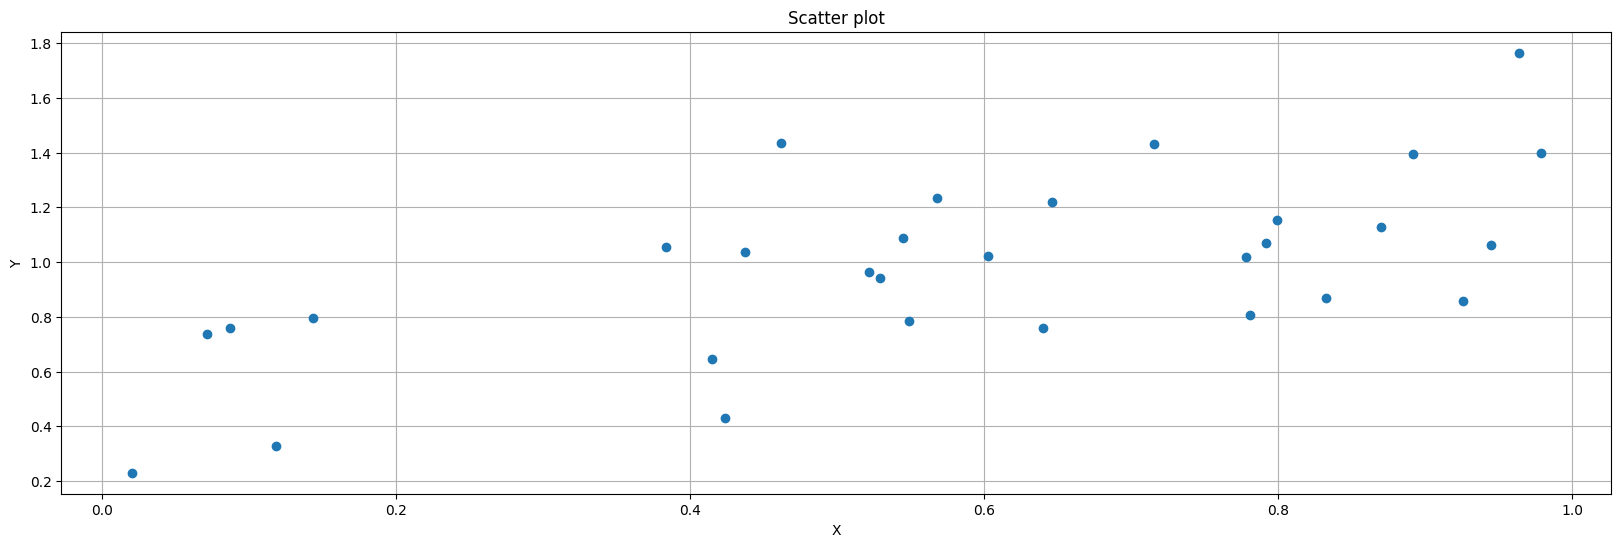

In [133]:
random.seed(0)
x = np.random.rand(30)
y = np.sin(x) + np.random.rand(30)

# グラフの大きさ
plt.figure(figsize=(20, 6))
plt.plot(x, y, 'o')

plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)

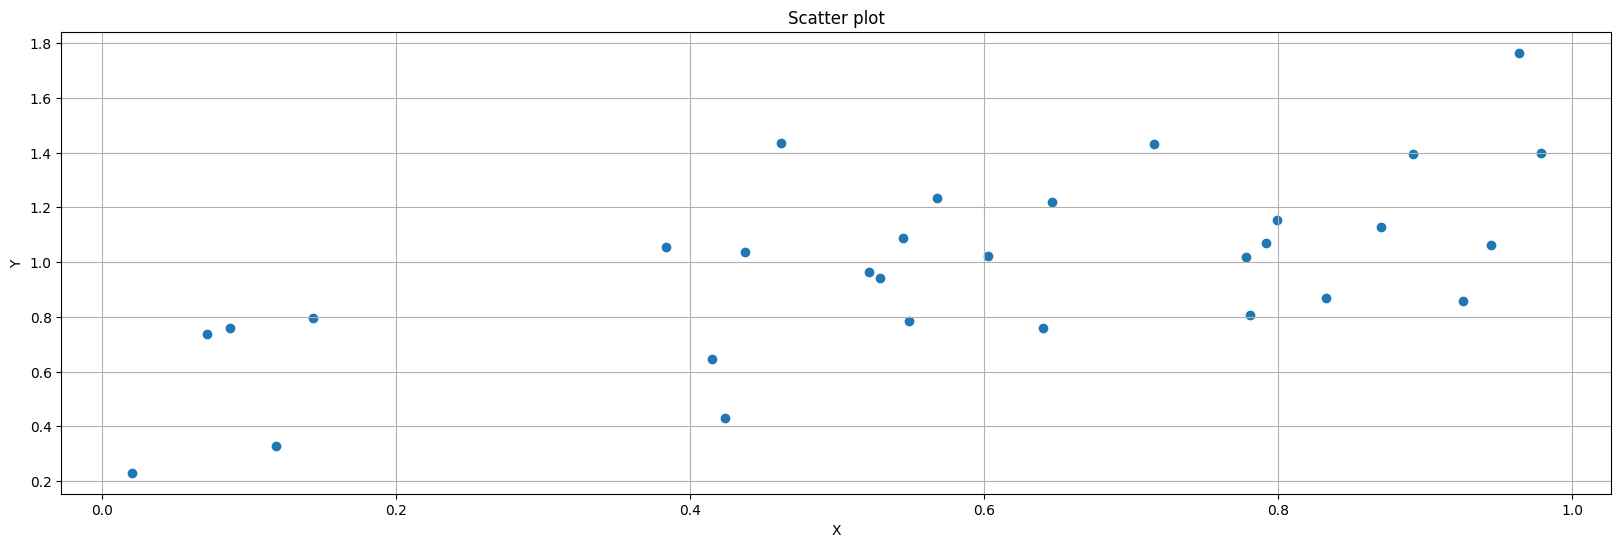

In [137]:
random.seed(0)
x = np.random.rand(30)
y = np.sin(x) + np.random.rand(30)

# グラフの大きさ
plt.figure(figsize=(20, 6))
plt.scatter(x, y)

plt.title('Scatter plot')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)

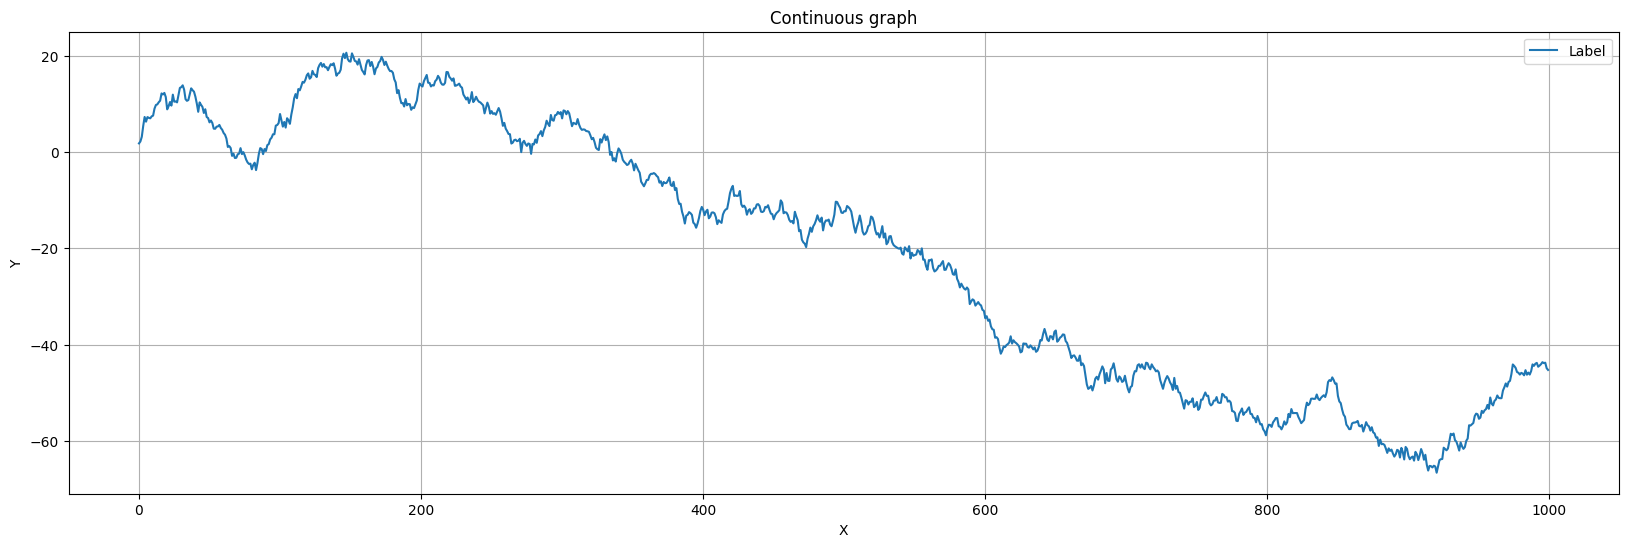

In [138]:
np.random.seed(0)
x = np.arange(1000)
y = np.random.randn(1000).cumsum()

plt.figure(figsize=(20, 6))
plt.plot(x, y, label='Label')
plt.legend()

plt.title('Continuous graph')
plt.xlabel('X')
plt.ylabel('Y')

plt.grid(True)

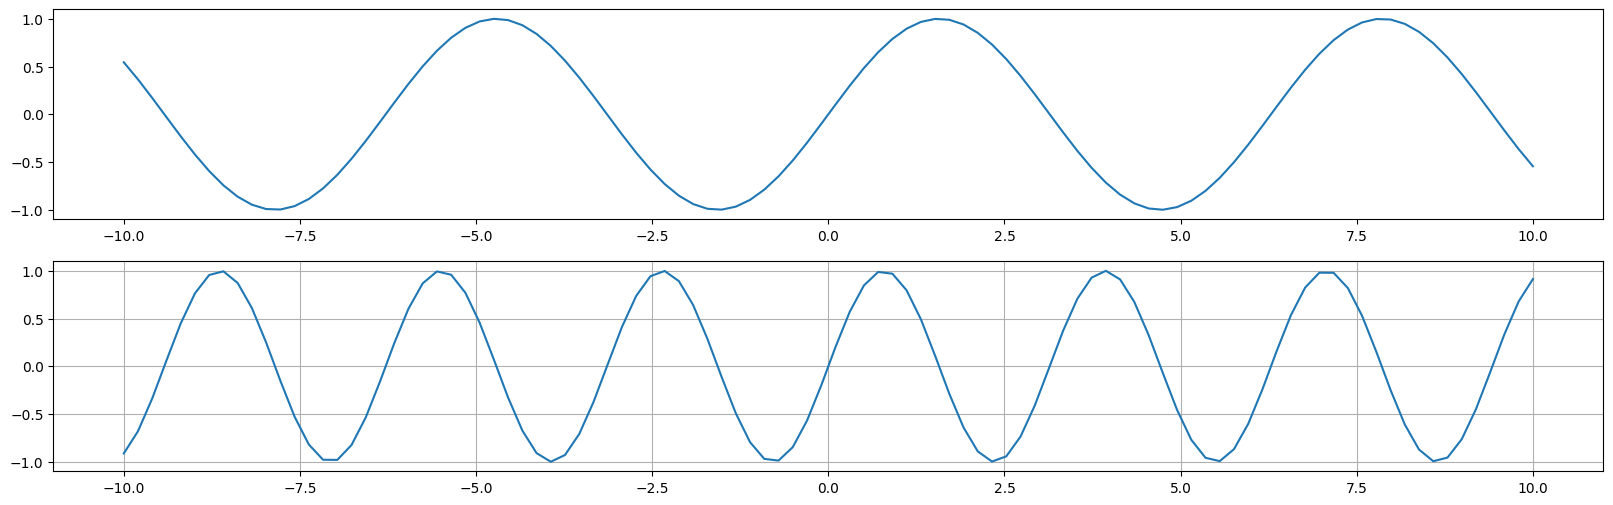

In [140]:
plt.figure(figsize=(20, 6))

plt.subplot(2, 1, 1)  # 2行1列の1つ目
x = np.linspace(-10, 10, 100)
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.sin(2*x))

plt.grid(True)

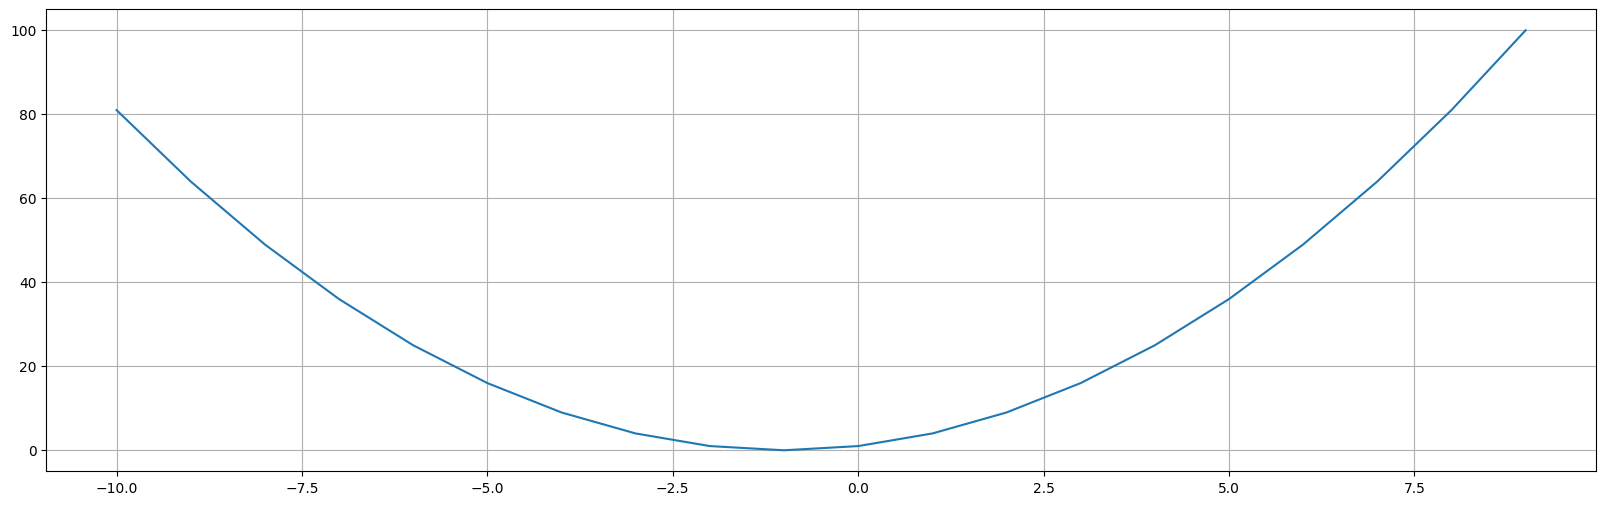

In [141]:
plt.figure(figsize=(20, 6))

x = np.arange(-10, 10)
y = x**2 + 2*x + 1

plt.plot(x, y)
plt.grid(True)

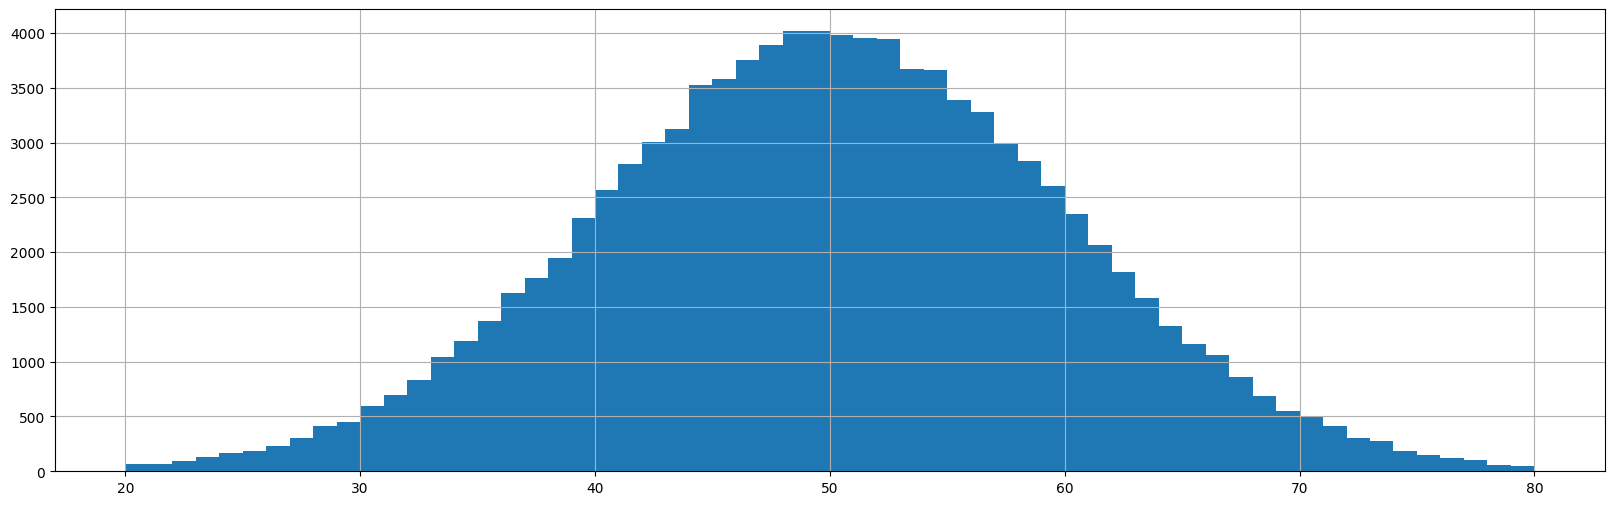

In [146]:
plt.figure(figsize=(20, 6))
random.seed(0)
plt.hist(np.random.randn(10**5) * 10 + 50, bins=60, range=(20, 80))  # 20~80の範囲にbinが60本
plt.grid(True)

In [150]:
# histのパラメータについて確認
?plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

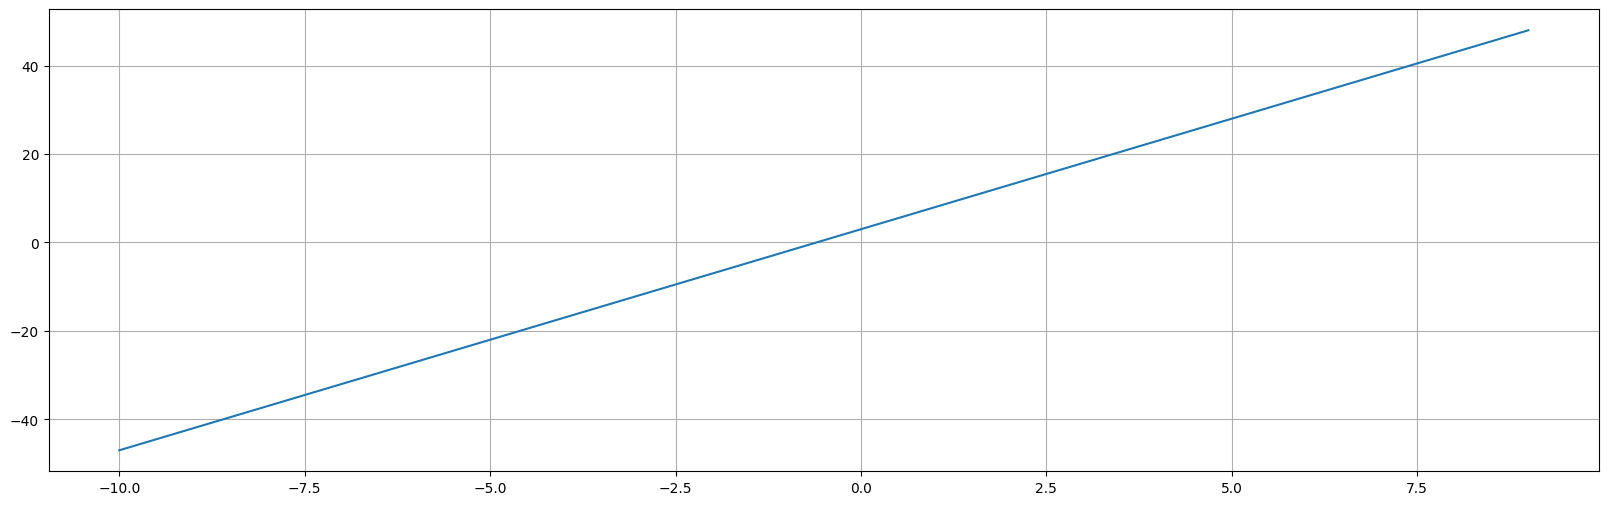

In [159]:
# p65
plt.figure(figsize=(20, 6))
x = np.arange(-10, 10)
y = 5*x + 3
plt.plot(x, y)
plt.grid(True)

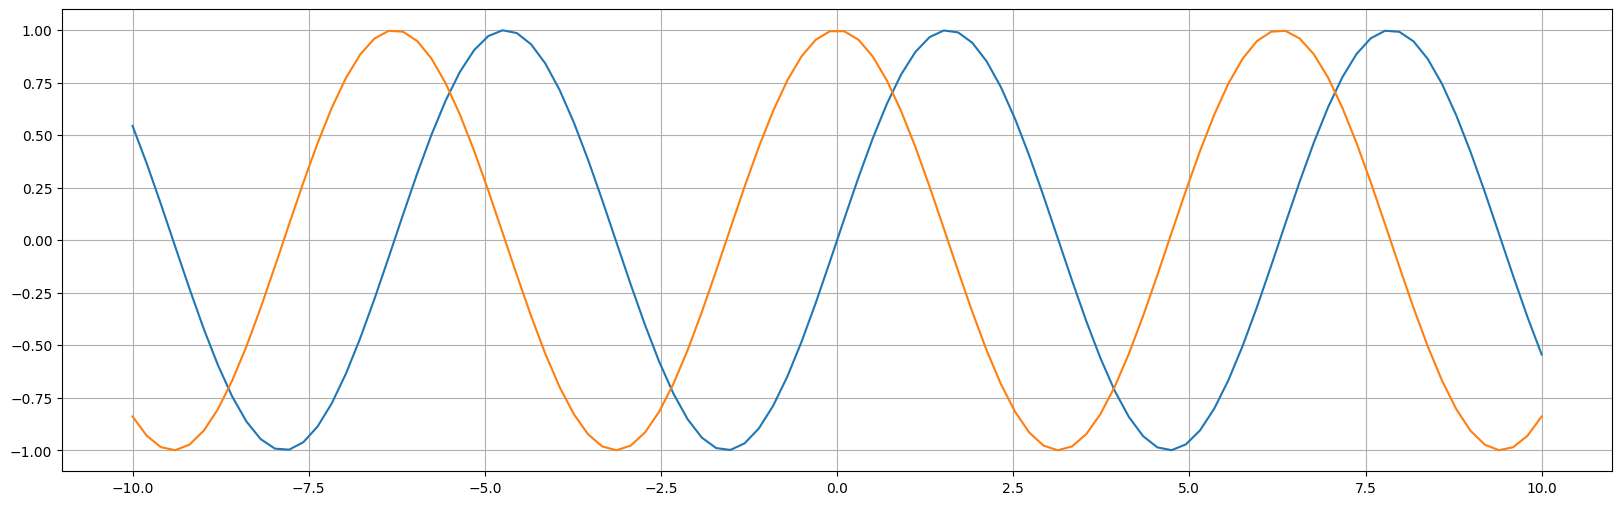

In [158]:
plt.figure(figsize=(20, 6))
x = np.linspace(-10, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.grid(True)

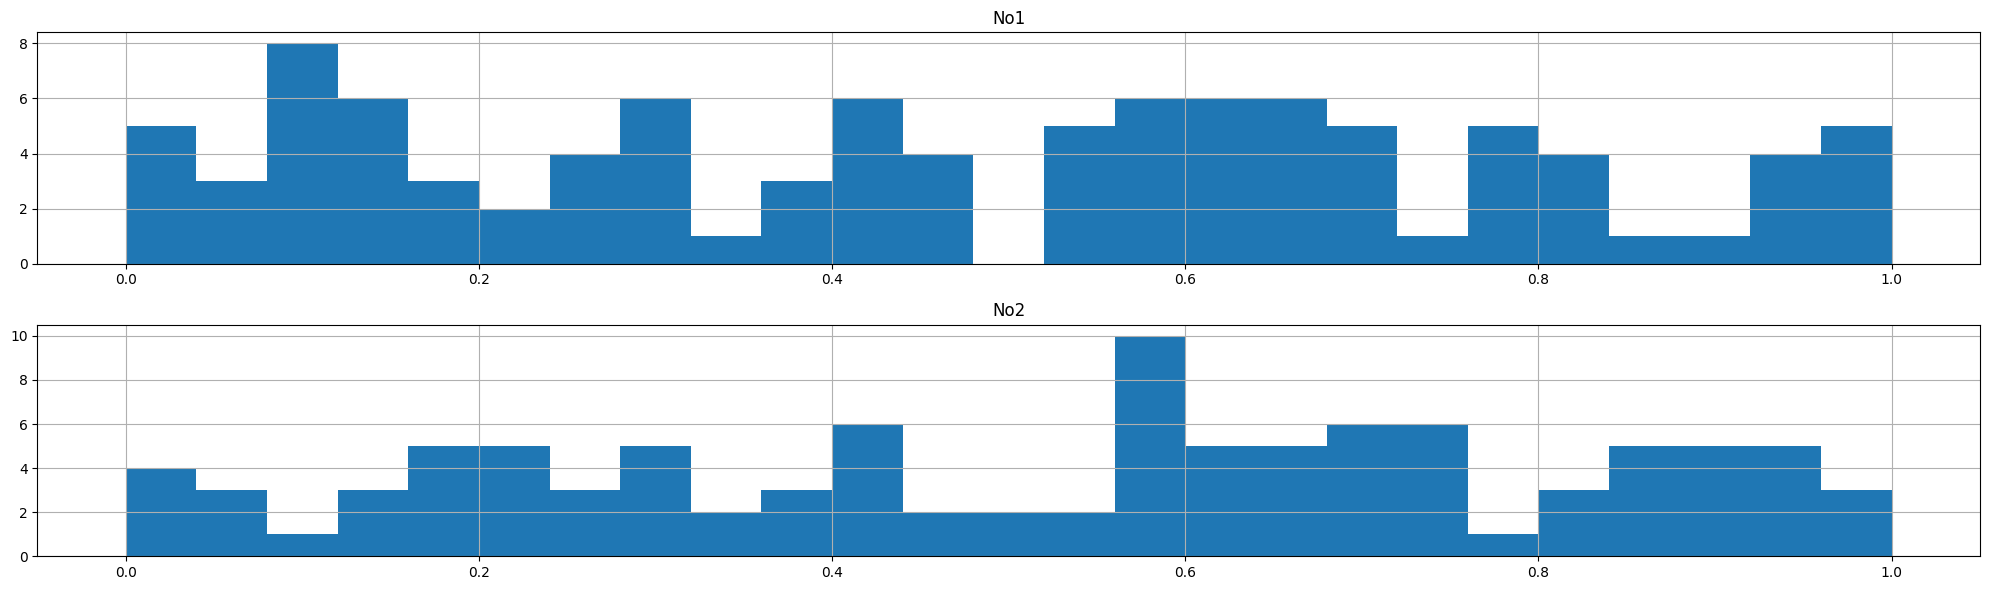

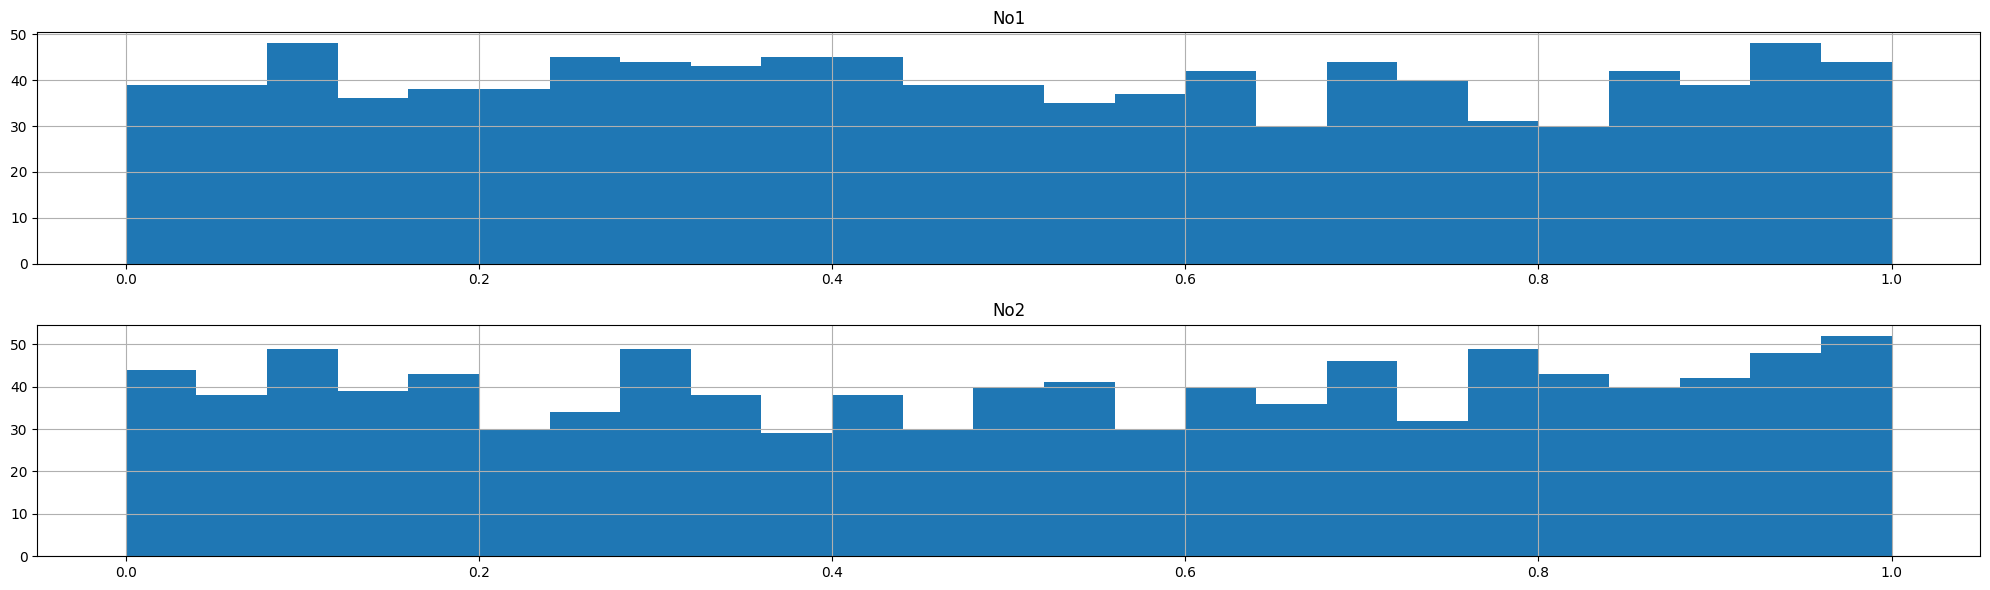

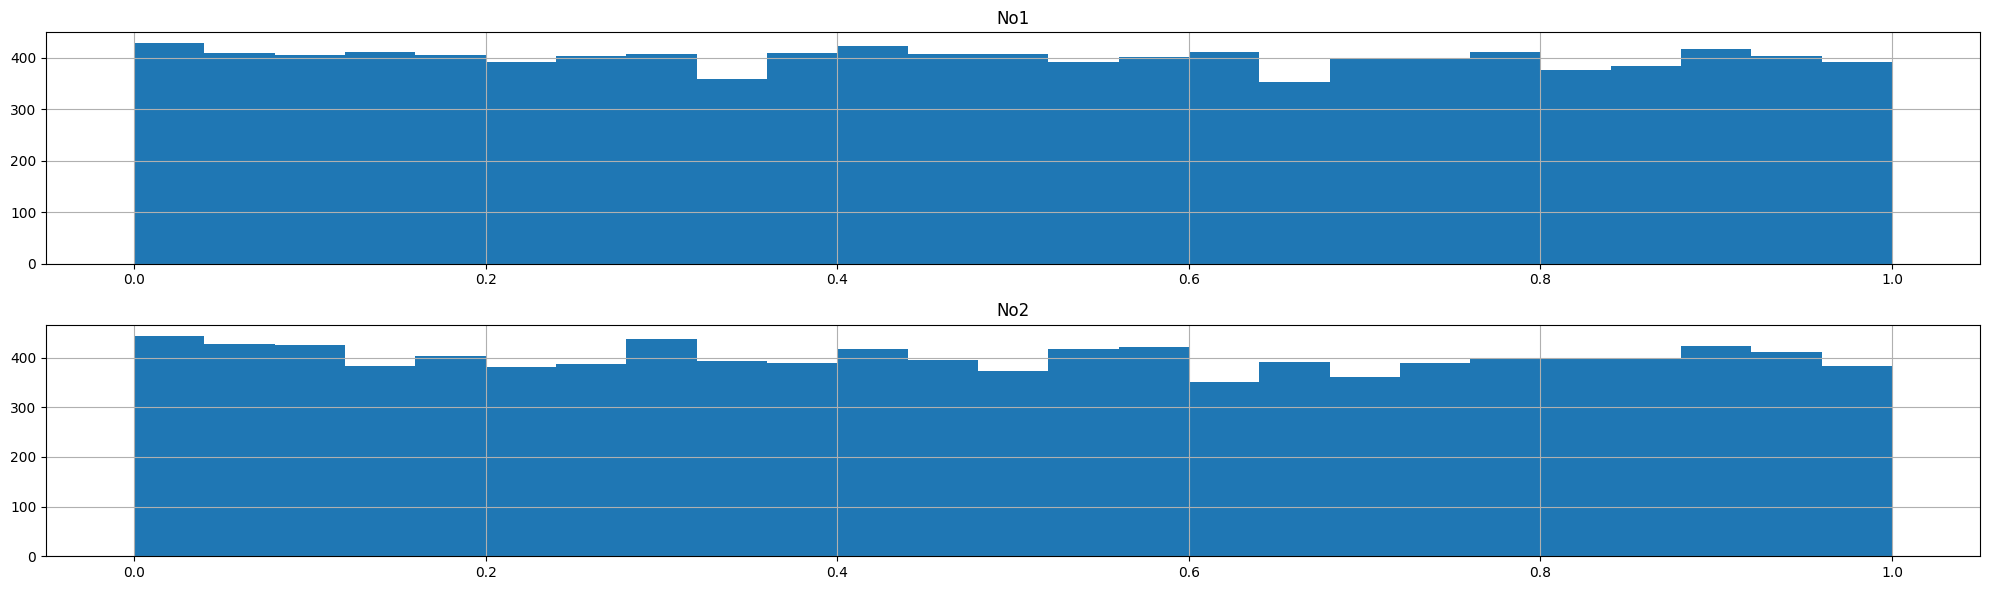

In [179]:
def uni_hist(n):
    random.seed(0)
    x1 = np.random.uniform(0.0, 1.0, n)
    x2 = np.random.uniform(0.0, 1.0, n)

    plt.figure(figsize=(20, 6))
    plt.subplot(2, 1, 1)
    plt.hist(x1, bins=25, range=(0, 1))
    plt.title('No1')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.hist(x2, bins=25, range=(0, 1))
    plt.title('No2')
    plt.grid(True)
    
    plt.tight_layout()
    
uni_hist(100)
uni_hist(1000)
uni_hist(10000)  # nが増えるにつれ、グラフのばらつきが小さくなる

# 2章 総合問題

In [231]:
# モンテカルロ法で円周率を求める
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
N = 10000
samp_x = np.random.uniform(0.0, 1.0, N)
samp_y = np.random.uniform(0.0, 1.0, N)

In [232]:
CIRCLE_R = 1
samp_l = np.hypot(samp_x, samp_y)  # hypotenuse

is_inside_circle = samp_l < CIRCLE_R
print(f'inside_circle: {is_inside_circle.sum()}')

inside_circle: 7868


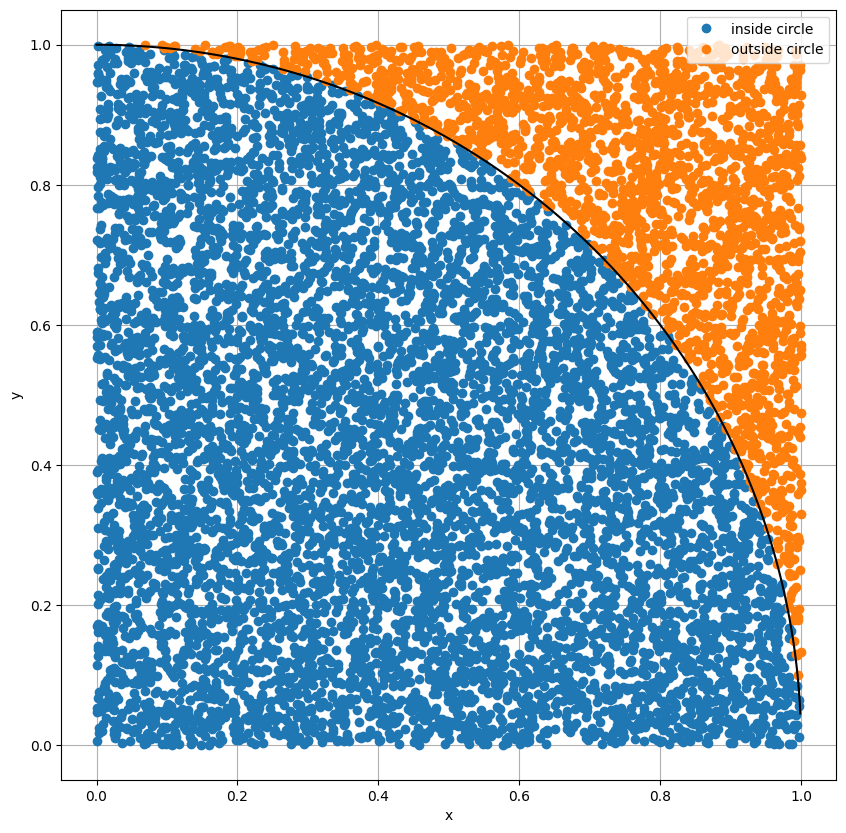

In [233]:
plt.figure(figsize=(10, 10))

# scatter
plt.plot(samp_x[is_inside_circle], samp_y[is_inside_circle], 'o', label='inside circle')
plt.plot(samp_x[~is_inside_circle], samp_y[~is_inside_circle], 'o', label='outside circle')
plt.legend()

# circle
cir_x = np.arange(0, 1, 0.001)
cir_y = np.sqrt(1 - cir_x**2)
plt.plot(cir_x, cir_y, color='k')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

In [234]:
# pi_/4 : 1 = is_inside_circle.sum() : N
pi_ = is_inside_circle.sum() * 4.0 / N
pi_

3.147